In [132]:
from __future__ import division
import matplotlib.pyplot as plt
import scipy.fft as sp 
from scipy.fft import fft, fftfreq, fftshift
from math import pi as PI
import math
import cmath
import numpy as np
from scipy import signal
import random as rand
from scipy.fftpack import fft, ifft


class FuncParams:
    def __init__(self, from_, to, ampl, omega, shift, N):
        self.From = from_
        self.To = to
        self.Ampl = ampl
        self.Omega = omega
        self.shift = shift
        self.N = N

class Function :
    x = []
    y = []
    
    def __init__(self, FuncParams):
      
       self.From = FuncParams.From
       self.To = FuncParams.To
       self.W = FuncParams.Omega
       self.N = FuncParams.N
       self.Shift = FuncParams.shift
       self.Ampl = FuncParams.Ampl

    def reset_x(self):
       # self.x.clear()
         self.x = np.linspace(self.From, self.To, self.N)

    def calc(self, func, *args, **func_args):
        self.reset_x()
        #for key, val in func_args.items():
         #   print(key, val)
        
        self.y = self.Ampl*func(self.W*(self.x+self.Shift), *args, **func_args)
    def plot(self):
        fig = plt.figure()
        subplot = fig.add_subplot(111)
        subplot.plot(self.x, self.y, 'b', marker='.')
               
        fig.show()

    def normalize(self, value):
        len_ = len(self.y)
        for i in range (0, len_):
            self.y[i] = self.y[i]/value

    def noize(self, intensity, level):
        if intensity >=0:
            increment = 1/intensity
            len_ = len(self.y)
            x = 0
            for i in range(0, len_):
                x+=increment
                if(x>=1):
                    x=0
                    self.y[i] += rand.uniform(-level, +level)

    def FFT(self):
        fft_lib_res = np.fft.fft(self.y)
        spacing_period = (self.From-self.To)/self.N

        xf = fftfreq(self.N, spacing_period)
        return [fftshift(xf), fftshift(fft_lib_res)]

    def IFFT(self):
        ifft_y = np.fft.ifft(self.y)
        #spacing_period = (self.From-self.To)/self.N

        ifft_x = np.linspace(self.From, self.To, len(ifft_y))
        return [ifft_x, ifft_y]
        
    

  
def get_step_Func(f_From, f_To, f_cut_From, f_cut_To, N_pts):
    #N_pts = get_points_numb(f_From, f_To, df)
    Step_Func = Function((FuncParams(f_From, f_To, 1, 1, 0, N_pts)))
    Step_Func.calc(step, f_cut_From, f_cut_To)
    return Step_Func
    

def normalize(y, val):
    for i in range(0, len(y)):
        y[i] = y[i]/val
    return y 

def get_module(y):
    res = []
    for i in range(len(y)):
        res.append(abs(y[i]))
    return res


def plot_y(y, title, From = 0, To = 0):
    fig = plt.figure()
    fig.suptitle(title)
    sp = fig.add_subplot(111)
    if(From != 0 or To != 0):
        x = np.linspace(From, To, len(y))
        sp.plot(x,y)
    else:
        sp.plot(y)
    fig.show()


def IFFT(x, y, from_, to_):
    ifft_y = np.fft.ifft(y)
    #spacing_period = (self.From-self.To)/self.N
    ifft_x = np.linspace(from_, to_, len(ifft_y))
    return [ifft_x, ifft_y]


def FFT(x, y, from_, to_, N):
    '''fft_lib_res = np.fft.fft(y)
    spacing_period = (from_ - to_ / N)

    xf = fftfreq(N, spacing_period)
    return [fftshift(xf), fftshift(fft_lib_res)]'''
    fft_lib_res = np.fft.fft(y)
    
    spacing_period = (to_ - from_)#(to_ - from_ / N)
    x_fft = []
    for i in range(0, len(fft_lib_res)):
        x_fft.append(i / spacing_period)
       
    return [x_fft, fft_lib_res]


def get_points_numb(t_from, t_to, dt):
    return int((t_to - t_from) / dt)


def get_sample_rate(pts_numb, t_from, t_to):
    return int(pts_numb / (t_to - t_from))


def step(x, *args, **kwargs):
    step_from_, step_to_ = args # откуда до куда будут ненулевые значения
                                               # + область определения функции
    
    samples_num = len(x)
    numb_of_pts_within = 0
    
    for x_ in x:
        if step_from_<=x_<=step_to_:
            numb_of_pts_within+=1 # колво точек попадающих в область ступеньки
    
    step_height = 1#1/numb_of_pts_within
    y = []
    for i in range(0, len(x)):
        if step_from_<=x[i]<=step_to_:
            y.append(step_height)
        else:
            y.append(0)
        
    return y

# Получение неидеального фильтра - От синкуса надо оставить часть точек, а остальное добить нулями
# Пробуем оставить часть точек синкуса, а остальные добить нулями
def cut_filter(Pts_to_keep, y_filt):
    Pts_to_keep_left = []
    Pts_to_keep_right = []
    if(Pts_to_keep%2 == 0):
        Pts_to_keep_aside = int(Pts_to_keep / 2)
        print(Pts_to_keep_aside)
        how_many_zeros = len(y_filt) - Pts_to_keep
        Pts_to_keep_left = y_filt[0 : Pts_to_keep_aside]
        Pts_to_keep_right = y_filt[ len(y_filt) - Pts_to_keep_aside : len(y_filt)]
        res = np.concatenate([Pts_to_keep_left, np.zeros(how_many_zeros)])
        res = np.concatenate([res, Pts_to_keep_right])
        return res

def adjust_filter(y):
    #print('len x = ', len(x))
    #x = change_halves(x, len(x)%2 == 0)
    y = change_halves(y, len(y)%2 == 0)
    return y

def mirror_func(x, y):
    x_ = list(x)
    x_ = np.flip(x)
    x_ = [-i for i in x_]
    x_ = np.concatenate([x_, x])
    
    y_ = list(y)
    y_ = np.flip(y_)
    y_  = np.concatenate([y_, y])
    return [x_, y_]

def change_halves(x, is_even):
    x_ = []
    if(is_even):
        x_ = x[len(x)//2 : ]
        print('x even len half x = ', len(x_))
        x_ = np.concatenate([x_, x[ : len(x)//2]])
    else:
        print('x not even')
        x_ = x[len(x)//2 : ]
        x_ = np.concatenate([x_, x[ : len(x)//2]])
    return x_

def plot(x, y, title):
    fig = plt.figure()
    fig.suptitle(title)
    sp = fig.add_subplot(111)
    sp.plot(x, y)
    fig.show()
    
    
def get_FFT_cut(Func):
    [x_fft, y_fft] = FFT(Func.x, Func.y, Func.From, Func.To, Func.N)
    x_fft_cut = x_fft[0 : len(x_fft)//2]
    y_fft_cut = y_fft[0: len(y_fft)//2]
    return [x_fft_cut, y_fft_cut]


def get_fourier_of_filtered_signal(src_spectrum, step):
    y_res = []
    if(len(src_spectrum) == len(step)):
        for i in range(len(src_spectrum)):
            y_res.append(src_spectrum[i] * step[i])
    return y_res
    
    
def plot_func_and_FFT(x, y, title):
    To = x[len(x)-1]
    From = x[0]
    fig = plt.figure()
    fig.suptitle(title)
    sp = fig.add_subplot(121)
    sp.plot(x, y, label = 'src func')
    sp.legend()
    
    [x_fft, y_fft] = FFT(x, y, From, To, len(x))
    sp = fig.add_subplot(122)
    sp.plot(x_fft, abs(y_fft), label = 'Fourier')
    sp.legend()
    
    fig.show()
    
    
def plot_pefrect_low_pass_filtered(Src_Func, f_cut, func_title):
    [x_fft_cut, y_fft_cut] = get_FFT_cut(Src_Func)
    plot_func_and_FFT(Src_Func.x, Src_Func.y, 'Src func ' + str(func_title))

    Step_Func = get_step_Func(0, x_fft_cut[len(x_fft_cut)-1], 0, f_cut, len(x_fft_cut)) # 5 == F_Nykvist / 2
    plot_func_and_FFT(Step_Func.x, Step_Func.y, 'Step')


    [x_ifft_step, y_ifft_step] = IFFT(Step_Func.x, Step_Func.y, 0, 1)
    y_ifft_step_adj = adjust_filter(y_ifft_step)
    plot(x_ifft_step, y_ifft_step_adj, 'Sincus')

    y_fourier_filtered = get_fourier_of_filtered_signal(y_fft_cut, Step_Func.y)


    [x_filtered, y_filtered] = IFFT(x_fft_cut, y_fourier_filtered, 0, 1)
    x = np.linspace(Src_Func.From, Src_Func.To, len(y_filtered))
    plot_func_and_FFT(x, y_filtered, 'Filtered signal (Perfect Filter) ' + str(func_title))
    
def plot_imperfect_low_pass_filtered(Src_Func, f_cut, Pts_to_keep, func_title):
    [x_fft_cut, y_fft_cut] = get_FFT_cut(Src_Func)
    plot_func_and_FFT(Src_Func.x, Src_Func.y, 'Src func ' + str(func_title))

    
    Step_Func = get_step_Func(0, x_fft_cut[len(x_fft_cut)-1], 0, f_cut, len(x_fft_cut)) # 5 == F_Nykvist / 2
    plot_func_and_FFT(Step_Func.x, Step_Func.y, 'Step')


    [x_ifft_step, y_ifft_step] = IFFT(Step_Func.x, Step_Func.y, 0, 1)

    y_ifft_step_cut = cut_filter(Pts_to_keep, y_ifft_step) # Оставили только 40 коэффициентов синкуса
    plot_y(y_ifft_step_cut, 'cut filter coeff-s', 0,1)

    imperfect_step = np.fft.fft(y_ifft_step_cut)
    plot(Step_Func.x, imperfect_step, 'Imperfect step')

    y_fourier_filtered = []
    if (len(y_fft_cut) == len(imperfect_step)):
        y_fourier_filtered = get_fourier_of_filtered_signal(y_fft_cut, imperfect_step)

    [x_filtered, y_filtered] = IFFT(x_fft_cut, y_fourier_filtered, 0, 1)
    x = np.linspace(sin_Func.From, sin_Func.To, len(y_filtered))
    plot_func_and_FFT(x, y_filtered, 'Filtered signal (Imperfect Filter) ' + str(func_title))
    
    
def plot_imperfect_high_pass_filtered(Src_Func, f_cut, Pts_to_keep, func_title):
    [x_fft_cut, y_fft_cut] = get_FFT_cut(Src_Func)
    plot_func_and_FFT(Src_Func.x, Src_Func.y, 'Src func ' + str(func_title))

    
    Step_Func = get_step_Func(0, x_fft_cut[len(x_fft_cut)-1], f_cut,x_fft_cut[len(x_fft_cut)-1], len(x_fft_cut)) # 5 == F_Nykvist / 2
    plot_func_and_FFT(Step_Func.x, Step_Func.y, 'Step')


    [x_ifft_step, y_ifft_step] = IFFT(Step_Func.x, Step_Func.y, 0, 1)

    y_ifft_step_cut = cut_filter(Pts_to_keep, y_ifft_step) # Оставили только 40 коэффициентов синкуса
    plot_y(y_ifft_step_cut, 'cut filter coeff-s', 0,1)

    imperfect_step = np.fft.fft(y_ifft_step_cut)
    plot(Step_Func.x, imperfect_step, 'Imperfect step')

    y_fourier_filtered = []
    if (len(y_fft_cut) == len(imperfect_step)):
        y_fourier_filtered = get_fourier_of_filtered_signal(y_fft_cut, imperfect_step)

    [x_filtered, y_filtered] = IFFT(x_fft_cut, y_fourier_filtered, 0, 1)
    x = np.linspace(sin_Func.From, sin_Func.To, len(y_filtered))
    plot_func_and_FFT(x, y_filtered, 'Filtered signal (Imperfect Filter) ' + str(func_title))
    
    
def plot_pefrect_high_pass_filtered(Src_Func, f_cut, func_title):
    [x_fft_cut, y_fft_cut] = get_FFT_cut(Src_Func)
    plot_func_and_FFT(Src_Func.x, Src_Func.y, 'Src func ' + str(func_title))

    Step_Func = get_step_Func(0, x_fft_cut[len(x_fft_cut)-1], f_cut, x_fft_cut[len(x_fft_cut)-1], len(x_fft_cut)) # 5 == F_Nykvist / 2
    plot_func_and_FFT(Step_Func.x, Step_Func.y, 'Step')


    [x_ifft_step, y_ifft_step] = IFFT(Step_Func.x, Step_Func.y, 0, 1)
    y_ifft_step_adj = adjust_filter(y_ifft_step)
    plot(x_ifft_step, y_ifft_step_adj, 'Sincus (IFFT Step)')

    y_fourier_filtered = get_fourier_of_filtered_signal(y_fft_cut, Step_Func.y)


    [x_filtered, y_filtered] = IFFT(x_fft_cut, y_fourier_filtered, 0, 1)
    x = np.linspace(Src_Func.From, Src_Func.To, len(y_filtered))
    plot_func_and_FFT(x, y_filtered, 'Filtered signal (Perfect Filter) ' + str(func_title))
    
    

    
    

    






<ipython-input-112-d717753bcd85>:250: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-113-cf93f7ff5576>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


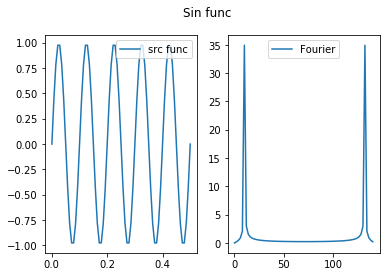

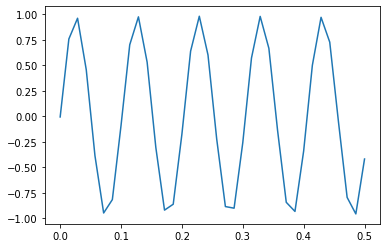

In [113]:
#sin
f=10
t_from = 0
t_to = 0.5
dt = 0.007

points_numb_func = get_points_numb(t_from, t_to, dt)


sin_Func = Function((FuncParams(t_from, t_to, 1, 1, 0, points_numb_func)))
sin_Func.reset_x()
sin_Func.y = np.sin(2*np.pi*f * sin_Func.x)
plot_func_and_FFT(sin_Func.x, sin_Func.y, 'Sin func')


[x_fft, y_fft] = FFT(sin_Func.x, sin_Func.y, sin_Func.From, sin_Func.To, sin_Func.N)
x_fft_cut = x_fft[len(x_fft)//2 :]
y_fft_cut = y_fft[len(y_fft)//2 :]
[x_ifft, y_ifft] = IFFT(x_fft_cut, y_fft_cut, sin_Func.From, sin_Func.To)
#
fig = plt.figure()
sp = fig.add_subplot(111)
sp.plot(x_ifft, y_ifft)
fig.show()


x even len half x =  250


<ipython-input-112-d717753bcd85>:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-112-d717753bcd85>:218: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-112-d717753bcd85>:218: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show th

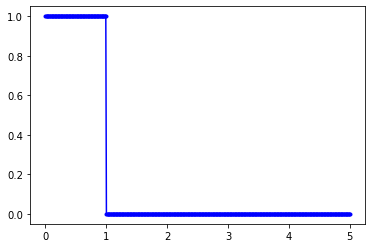

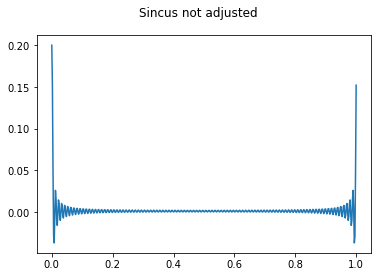

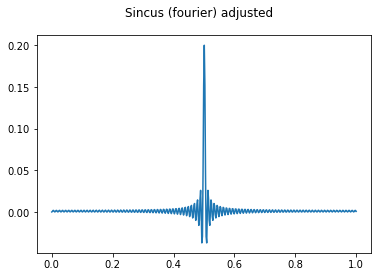

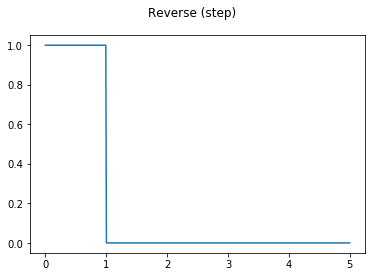

In [114]:
# обратное фурье от ступеньки

freq_from = 0
freq_to = 5
df = 0.01
N_pts = get_points_numb(freq_from, freq_to, df)


Step_Func = Function((FuncParams(freq_from, freq_to, 1, 1, 0, N_pts)))
Step_Func.calc(step, 0,1)
Step_Func.plot()


[x_ifft, y_ifft] = IFFT(Step_Func.x, Step_Func.y, 0, 1)
plot(x_ifft, y_ifft, 'Sincus not adjusted')
     
# Поменять половинки местами
y_ifft_adj = adjust_filter(y_ifft)
plot(x_ifft, y_ifft_adj, 'Sincus (fourier) adjusted')

# Обратное преобразование в ступень
y_fft = np.fft.fft(y_ifft)
plot_y(y_fft, 'Reverse (step)', From = freq_from, To = freq_to)


x even len half x =  250


<ipython-input-112-d717753bcd85>:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-112-d717753bcd85>:218: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-112-d717753bcd85>:218: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show th

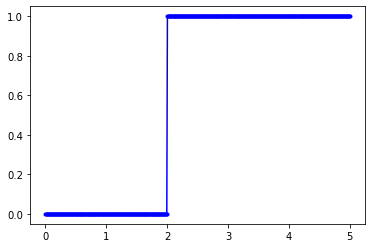

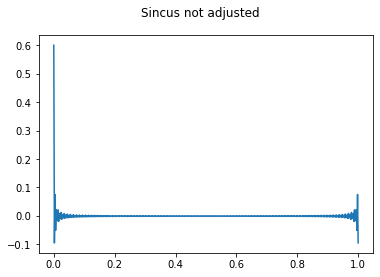

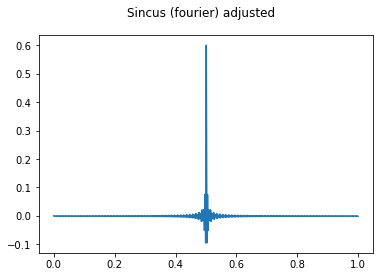

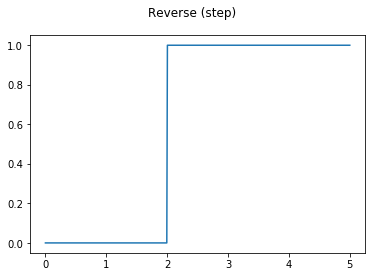

In [115]:
# Преобразование от другой ступеньки

# обратное фурье от ступеньки
freq_from = 0
freq_to = 5 # Nykvist frequency == 1/(2*dt), where dt stands for how you set the Function
df = 0.01
N_pts = get_points_numb(freq_from, freq_to, df)


Step_Func = Function((FuncParams(freq_from, freq_to, 1, 1, 0, N_pts)))
Step_Func.calc(step, 2,5)
Step_Func.plot()


[x_ifft, y_ifft] = IFFT(Step_Func.x, Step_Func.y, 0, 1)
plot(x_ifft, y_ifft, 'Sincus not adjusted')
     
# Поменять половинки местами

y_ifft_adj = adjust_filter(y_ifft)
plot(x_ifft, y_ifft_adj, 'Sincus (fourier) adjusted')

# Обратное преобразование в ступень
y_fft = np.fft.fft(y_ifft)
plot_y(y_fft, 'Reverse (step)', From = freq_from, To = freq_to)




<ipython-input-132-a68130bb637a>:250: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-132-a68130bb637a>:250: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-132-a68130bb637a>:218: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, c

x even len half x =  150


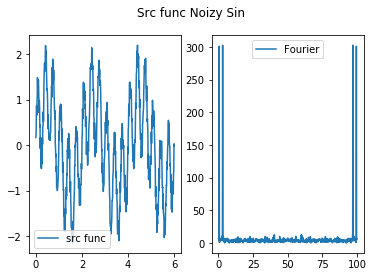

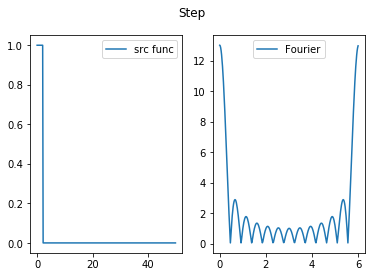

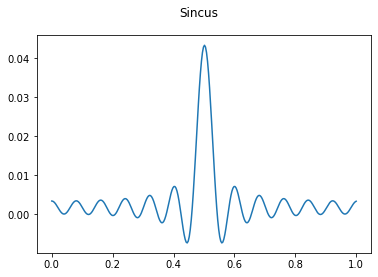

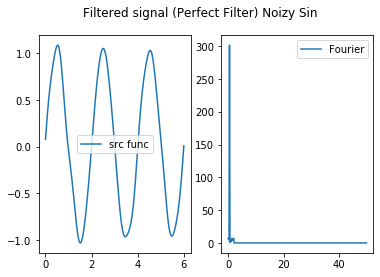

In [140]:
t_from = 0
t_to = 6
dt = 0.01
N = get_points_numb(t_from, t_to, dt)


f1 = 3
f2 = 0.5
noize_level=0.3
noize_intensity=0.17
sin_Func = Function((FuncParams(t_from, t_to, 1, 1, 0, N)))
sin_Func.reset_x()
sin_Func.y = np.sin(2*np.pi*f1* sin_Func.x) + np.sin(2*np.pi * f2*sin_Func.x)
sin_Func.noize(noize_intensity, noize_level)

plot_pefrect_low_pass_filtered(sin_Func, 2, 'Noizy Sin')


<ipython-input-132-a68130bb637a>:250: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-132-a68130bb637a>:250: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-132-a68130bb637a>:114: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, c

25


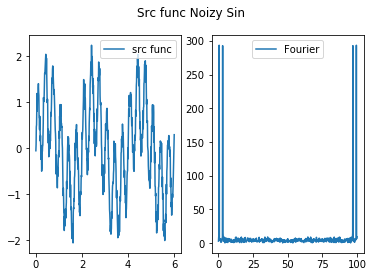

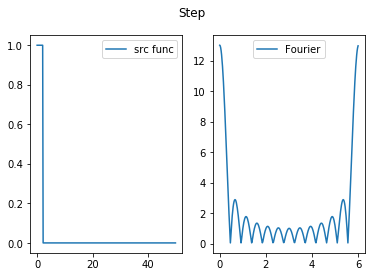

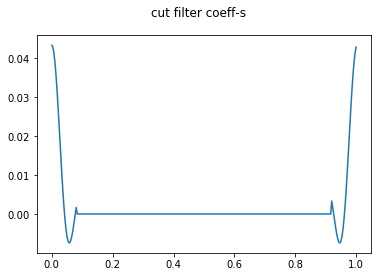

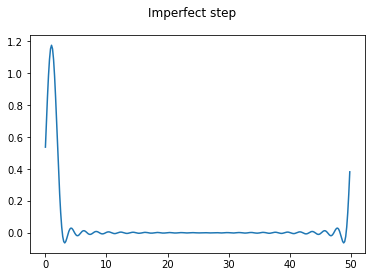

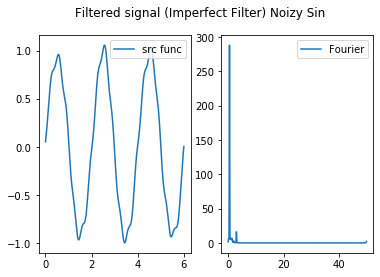

In [142]:
t_from = 0
t_to = 6
dt = 0.01
N = get_points_numb(t_from, t_to, dt)


f1 = 3
f2 = 0.5
noize_level=0.3
noize_intensity=0.17
sin_Func = Function((FuncParams(t_from, t_to, 1, 1, 0, N)))
sin_Func.reset_x()
sin_Func.y = np.sin(2*np.pi*f1* sin_Func.x) + np.sin(2*np.pi * f2*sin_Func.x)
sin_Func.noize(noize_intensity, noize_level)

plot_imperfect_low_pass_filtered(sin_Func, 2, 50, 'Noizy Sin')


<ipython-input-123-06fdde1e3ee1>:250: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-123-06fdde1e3ee1>:250: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-123-06fdde1e3ee1>:218: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, c

x even len half x =  150


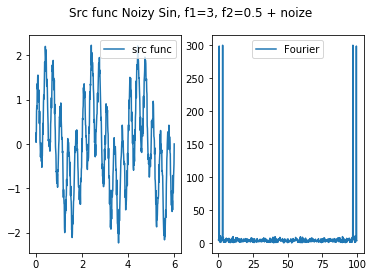

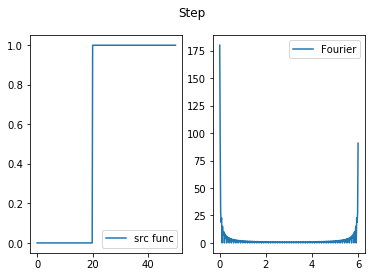

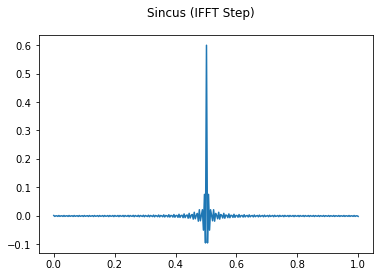

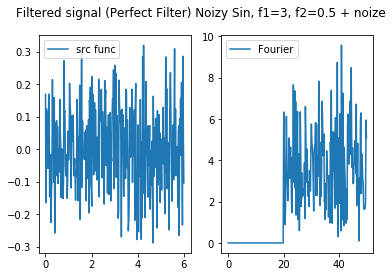

In [128]:
# Фильтры Высоких частот

t_from = 0
t_to = 6
dt = 0.01
N = get_points_numb(t_from, t_to, dt)


f1 = 3
f2 = 0.5
noize_level=0.3
noize_intensity=0.17
sin_Func = Function((FuncParams(t_from, t_to, 1, 1, 0, N)))
sin_Func.reset_x()
sin_Func.y = np.sin(2*np.pi*f1* sin_Func.x) + np.sin(2*np.pi * f2*sin_Func.x)
sin_Func.noize(noize_intensity, noize_level)



plot_pefrect_high_pass_filtered(sin_Func, 20, 'Noizy Sin, f1=3, f2=0.5 + noize')

<ipython-input-132-a68130bb637a>:250: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-132-a68130bb637a>:250: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-132-a68130bb637a>:114: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, c

125


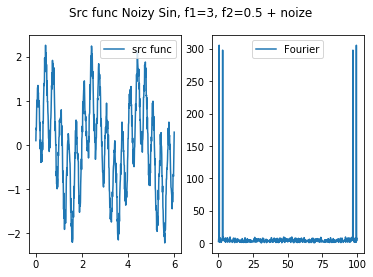

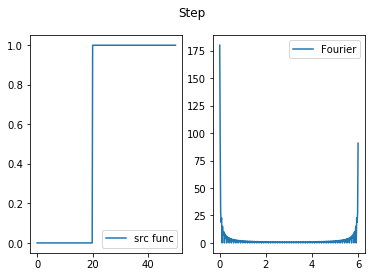

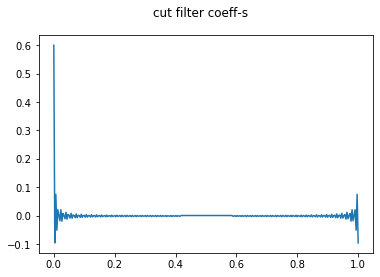

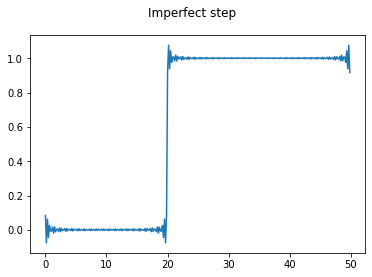

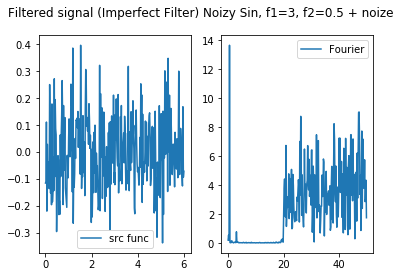

In [143]:
t_from = 0
t_to = 6
dt = 0.01
N = get_points_numb(t_from, t_to, dt)


f1 = 3
f2 = 0.5
noize_level=0.3
noize_intensity=0.17
sin_Func = Function((FuncParams(t_from, t_to, 1, 1, 0, N)))
sin_Func.reset_x()
sin_Func.y = np.sin(2*np.pi*f1* sin_Func.x) + np.sin(2*np.pi * f2*sin_Func.x)
sin_Func.noize(noize_intensity, noize_level)


plot_imperfect_high_pass_filtered(sin_Func, 20, 250, 'Noizy Sin, f1=3, f2=0.5 + noize')

<ipython-input-132-a68130bb637a>:250: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-132-a68130bb637a>:250: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-132-a68130bb637a>:218: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, c

x even len half x =  250


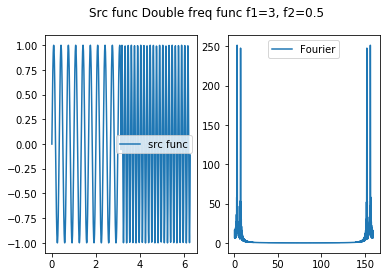

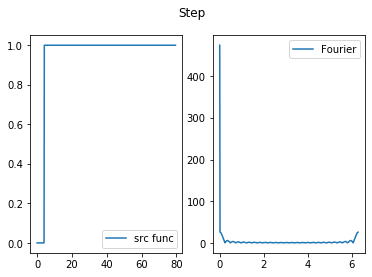

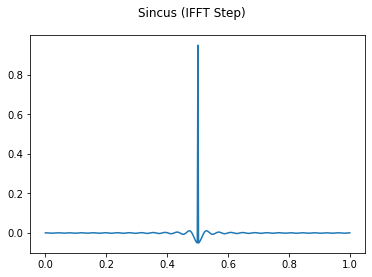

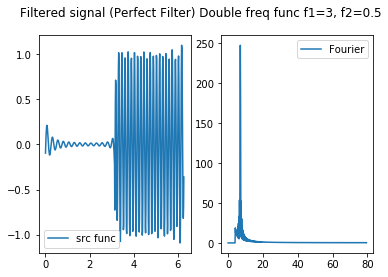

In [144]:
# Пример сначала с обной частотой, потом с другой
points_numb_left = 500
points_numb_right = 500
f_1 = 3
f_2 = 7
t_from = 0
t_middle = np.pi
t_to = 2*np.pi


x = np.linspace(t_from, t_middle, points_numb_left)
y = np.sin(2*np.pi*f_1*x)

x = np.linspace(t_middle, t_to, points_numb_right)
y_temp = np.sin(2*np.pi*f_2*x)
y_concat=np.concatenate([y,y_temp])

Double_freq_func = Function((FuncParams(from_=t_from, to=t_to, ampl=1, omega=1, shift=0, N=points_numb_left+points_numb_right)))

x = np.linspace(t_from, t_to, Double_freq_func.N)
Double_freq_func.x=x
Double_freq_func.y=np.concatenate([y,y_temp])

f_cut = 4
plot_pefrect_high_pass_filtered(Double_freq_func, f_cut, 'Double freq func f1=' + str(f1) + ', f2=' + str(f2))

<ipython-input-132-a68130bb637a>:250: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-132-a68130bb637a>:250: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-132-a68130bb637a>:114: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, c

10


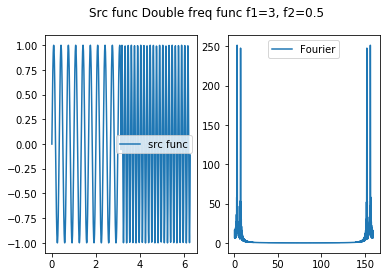

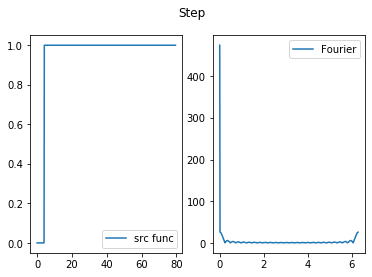

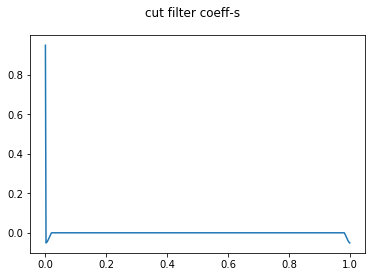

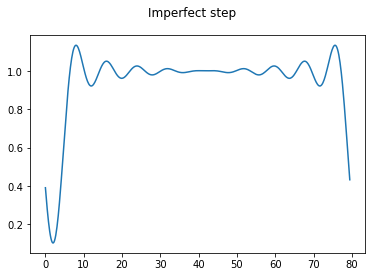

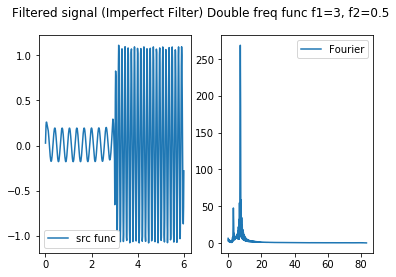

In [145]:
# Пример сначала с обной частотой, потом с другой
points_numb_left = 500
points_numb_right = 500
f_1 = 3
f_2 = 7
t_from = 0
t_middle = np.pi
t_to = 2*np.pi


x = np.linspace(t_from, t_middle, points_numb_left)
y = np.sin(2*np.pi*f_1*x)

x = np.linspace(t_middle, t_to, points_numb_right)
y_temp = np.sin(2*np.pi*f_2*x)
y_concat=np.concatenate([y,y_temp])

Double_freq_func = Function((FuncParams(from_=t_from, to=t_to, ampl=1, omega=1, shift=0, N=points_numb_left+points_numb_right)))

x = np.linspace(t_from, t_to, Double_freq_func.N)
Double_freq_func.x=x
Double_freq_func.y=np.concatenate([y,y_temp])

f_cut = 4
pts_to_keep = 20
plot_imperfect_high_pass_filtered(Double_freq_func, f_cut, pts_to_keep, 'Double freq func f1=' + str(f1) + ', f2=' + str(f2))

<ipython-input-132-a68130bb637a>:250: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-132-a68130bb637a>:250: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-132-a68130bb637a>:218: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, c

x not even


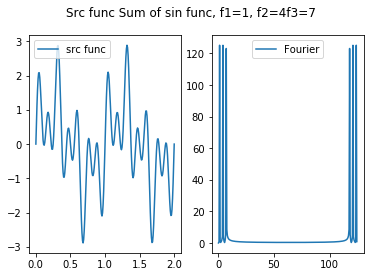

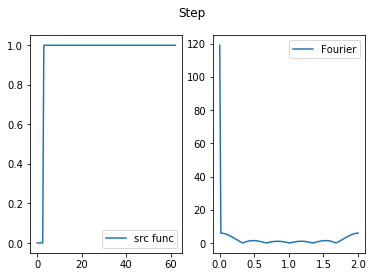

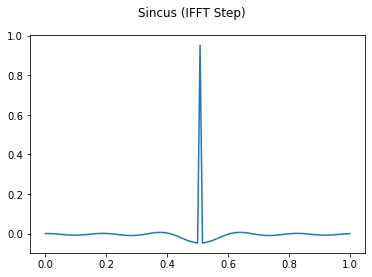

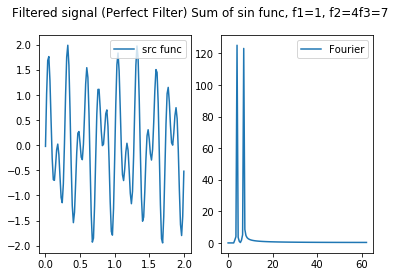

In [159]:
#Сумма синусов  - обрезка самых высоких частот
t_from = 0
t_to = 2
dt = 0.008
N_pts = get_points_numb(t_from, t_to, dt)
#sample_rate = get_sample_rate(N_pts, t_from, t_to)
sin_Func = Function((FuncParams(t_from, t_to, 1, 1, 0, N_pts)))
sin_Func.reset_x()

f1=1
f2=4
f3=7
sin_Func.y = np.sin(f1 * 2 * np.pi * sin_Func.x) + np.sin(f2 * 2 * np.pi * sin_Func.x) + np.sin(f3 * 2 * np.pi * sin_Func.x)

f_cut = 3
plot_pefrect_high_pass_filtered(sin_Func, f_cut, 'Sum of sin func, f1=' + str(f1) + ', f2=' + str(f2) + 'f3='+str(f3))



<ipython-input-132-a68130bb637a>:250: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-132-a68130bb637a>:250: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-132-a68130bb637a>:114: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, c

10


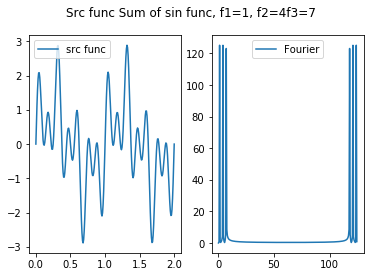

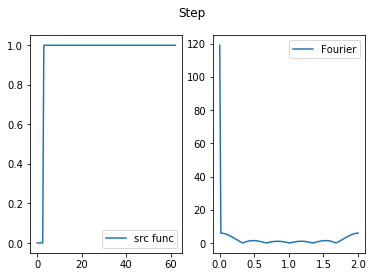

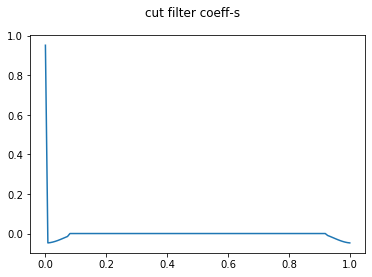

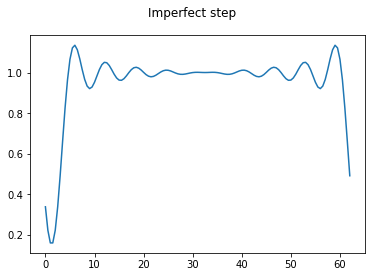

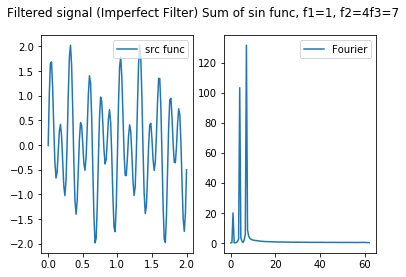

In [162]:
#Сумма синусов  - обрезка самых высоких частот
t_from = 0
t_to = 2
dt = 0.008
N_pts = get_points_numb(t_from, t_to, dt)
#sample_rate = get_sample_rate(N_pts, t_from, t_to)
sin_Func = Function((FuncParams(t_from, t_to, 1, 1, 0, N_pts)))
sin_Func.reset_x()

f1=1
f2=4
f3=7
sin_Func.y = np.sin(f1 * 2 * np.pi * sin_Func.x) + np.sin(f2 * 2 * np.pi * sin_Func.x) + np.sin(f3 * 2 * np.pi * sin_Func.x)

f_cut = 3
pts_to_keep = 20
plot_imperfect_high_pass_filtered(sin_Func, f_cut, pts_to_keep, 'Sum of sin func, f1=' + str(f1) + ', f2=' + str(f2) + 'f3='+str(f3))
